In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/home/Ima/work/Dataset/insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])



Missing Values:
 Series([], dtype: int64)


In [68]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


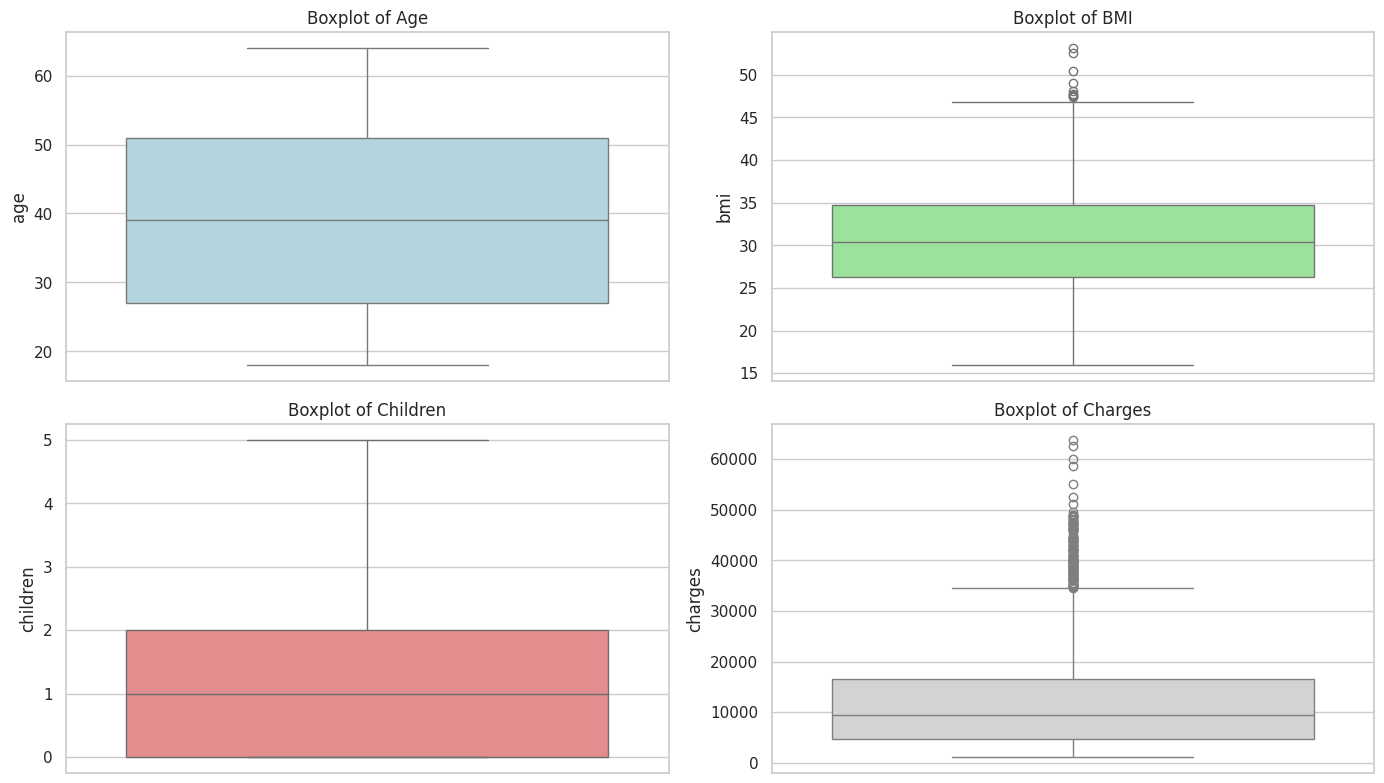

In [69]:
#plotting for each feature
sns.set(style="whitegrid")

#age
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['age'], color='lightblue')
plt.title('Boxplot of Age')

#BMI
plt.subplot(2, 2, 2)
sns.boxplot(y=df['bmi'], color='lightgreen')
plt.title('Boxplot of BMI')

#Children
plt.subplot(2, 2, 3)
sns.boxplot(y=df['children'], color='lightcoral')
plt.title('Boxplot of Children')

#Charges
plt.subplot(2, 2, 4)
sns.boxplot(y=df['charges'], color='lightgray')
plt.title('Boxplot of Charges')

plt.tight_layout()
plt.show()

In [70]:
#we can see the outliers in BMI and Charges

In [71]:
#encoding
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)
encoded_df.index = df.index
df_numeric = df.drop(columns=categorical_cols)
df_encoded = pd.concat([df_numeric, encoded_df], axis=1)
print("Encoded dataset shape:", df_encoded.shape)
df.head()

Categorical columns: ['sex', 'smoker', 'region']
Encoded dataset shape: (1338, 12)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Normalizing 
rom sklearn.preprocessing import StandardScaler
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [74]:
#Training the model and finding top features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances}).sort_values(by='Importance', ascending=False)


print(feature_importance_df.head(10))


            Feature  Importance
5         smoker_no    0.451506
1               bmi    0.213154
6        smoker_yes    0.157113
0               age    0.133897
2          children    0.019255
7  region_northeast    0.005162
9  region_southeast    0.004391
8  region_northwest    0.004145
3        sex_female    0.004083
4          sex_male    0.004031


In [81]:
important_features = ['smoker_no', 'bmi', 'age', 'children', 'region_northeast', 
                      'region_northwest', 'sex_male', 'region_southeast']

X = df_encoded[important_features]
y = df_encoded["charges"]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=200,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.8511042735155406
RMSE: 22467045.8663792
